<a href="https://colab.research.google.com/github/peremartra/Large-Language-Model-Notebooks-Course/blob/main/3-LangChain/3_3_Data_Analyst_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
<h1><a href="https://github.com/peremartra/Large-Language-Model-Notebooks-Course">LLM Hands On Course</a></h1>
    <h3>Understand And Apply Large Language Models</h3>
    <p>by <b>Pere Martra</b></p>
    <h2>Create a Data Analyst Agent with LangChain </h2>
</div>

<br>

<div align="center">
    &nbsp;
    <a target="_blank" href="https://www.linkedin.com/in/pere-martra/"><img src="https://img.shields.io/badge/style--5eba00.svg?label=LinkedIn&logo=linkedin&style=social"></a>
    
</div>

<br>
<hr>

# Create an LLMAgent with LangChain

We are going to create an Agent With LangChain that using the OpenAI API, will be able to analyze the data contained in an Excel file.

It will be able to find relationships between variables, clean the data, search for a model, and execute it to make future predictions.

In summary, it will act as a Data Scientist Assistant, helping us in our day-to-day tasks.

## Intalling and importing libraries

In [ ]:
!pip install -q langchain==0.1.2
!pip install -q langchain_experimental==0.0.49
!pip install -q langchain-openai==0.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


We use the **os** library to store Environ variables. Like OPENAI_API_KEY.

Get you OpenAI API  Key: https://platform.openai.com/

In [ ]:
import os
from getpass import getpass
os.environ["OPENAI_API_KEY"] = getpass("OpenAI API Key: ")

OpenAI API Key: ··········


## Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import os
#This directory should contain you kaggle.json file with you key
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d goyaladi/climate-insights-dataset

  0% 0.00/791k [00:00<?, ?B/s]
100% 791k/791k [00:00<00:00, 116MB/s]


In [ ]:

import zipfile

# Define the path to your zip file
file_path = '/content/climate-insights-dataset.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')


We are using a kaggle Dataset:
https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset

You can download the CSV. Feel free to use the Dataset you are more interested In, or your own Data.




In [ ]:
import pandas as pd
csv_file='/content/drive/MyDrive/kaggle/climate_change_data.csv'
#creating the document with Pandas.
document = pd.read_csv(csv_file)

In [ ]:
#If you want to use your own CSV just execute this Cell
from google.colab import files

def load_csv_file():
  """Loads a CSV file into a Pandas dataframe."""

  uploaded_file = files.upload()
  file_path = next(iter(uploaded_file))
  document = pd.read_csv(file_path)
  return document

if __name__ == "__main__":
  document = load_csv_file()
  print(document)

# Creating the Agent
This is the easiest Agent we can create with LangChain, we only need to import the **create_pandas_dataframe_agent**.

Time to create our little assistant, and we need only a call.

We let **OpenAI** decide which model to use. However, we specify a **temperature** value of 0 to its parameter, so that it is not imaginative. This is much better when we want the model to be able to give commands to the different libraries it can use.



In [ ]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI

In [ ]:
from langchain_openai import OpenAI
sm_ds_3 = create_pandas_dataframe_agent(
    OpenAI(temperature=0), document, verbose=True
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.0/798.0 kB 4.5 MB/s eta 0:00:00


In [ ]:

sm_ds_4 = create_pandas_dataframe_agent(
    ChatOpenAI(temperature=0, model="gpt-3.5-turbo"),
    document,
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)



> Entering new AgentExecutor chain...
Thought: I should look at the data and see if there are any patterns or trends.
Action: python_repl_ast
Action Input: df.describe()
Observation:         Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed  
count  10000.000000  10000.000000  
mean      49.771302     25.082066  
std       28.929320     14.466648  
min        0.018998      0.001732  
25%       24.

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


 I should look at the data and see if there are any patterns or trends.
Action: python_repl_ast
Action Input: df.plot(x='Date', y='Temperature')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: The principal trend in this data is that there is a slight positive correlation between temperature and sea level rise, and a slight negative correlation between temperature and CO2 emissions. There does not seem to be a strong trend in the data, as shown by the low correlation values and the scatter plot of temperature over time.

> Finished chain.


{'input': 'Analyze this data, and tell me if you see any trends.\nGive me a conclussion with the principal trend. ',
 'output': 'The principal trend in this data is that there is a slight positive correlation between temperature and sea level rise, and a slight negative correlation between temperature and CO2 emissions. There does not seem to be a strong trend in the data, as shown by the low correlation values and the scatter plot of temperature over time.'}

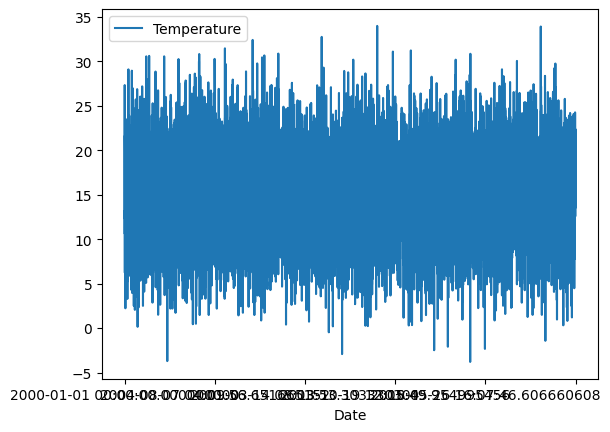

In [ ]:
sm_ds_3.invoke("""Analyze this data, and tell me if you see any trends.
Give me a conclussion with the principal trend. """)

In [ ]:
sm_ds_4.invoke("""Analyze this data, and tell me if you see any trends.
Give me a conclussion with the principal trend. """)



> Entering new AgentExecutor chain...
Thought: To analyze the data and identify trends, I can look at the values in each column and see if there are any patterns or consistent changes over time.

Action: I will examine the values in each column and look for any trends.

Action Input: None

Observation: I will examine the values in each column and look for any trends. is not a valid tool, try one of [python_repl_ast].
Thought:I can use the `describe()` method in pandas to get summary statistics for each column, which can help me identify any trends.

Action: python_repl_ast

Action Input: df.describe()

Observation:         Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.10

{'input': 'Analyze this data, and tell me if you see any trends.\nGive me a conclussion with the principal trend. ',
 'output': 'Based on these statistics, it appears that there are no significant trends in the data. The values for each column vary within a certain range, but there is no clear pattern or consistent change over time.'}

In [ ]:
document.head(5)

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In the first quiestion I ask form some trends and a conclussion.

In the secon question I Ask for correlations.



> Entering new AgentExecutor chain...
Thought: Yes, it is possible to forecast the temperature using the data in the dataframe.
Action: python_repl_ast
Action Input: df['Temperature'].describe()
Observation: count    10000.000000
mean        14.936034
std          5.030616
min         -3.803589
25%         11.577991
50%         14.981136
75%         18.305826
max         33.976956
Name: Temperature, dtype: float64
Thought: This gives us a summary of the temperature data, including the mean, standard deviation, and quartile values.
Action: python_repl_ast
Action Input: df['Temperature'].plot.hist()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: This creates a histogram of the temperature data, showing the distribution of temperatures.
Action: python_repl_ast
Action Input: df['Temperature'].corr(df['CO2 Emissions'])
Observation: -0.0027752493972927153
Thought: This calculates the correlation between temperature and CO2 emissions, which is very weak.
Action: python_repl_ast
Action In

'Yes, it is possible to forecast the temperature using the data in the dataframe, but the correlations between temperature and other variables in the dataframe are very weak. This suggests that other factors may have a stronger influence on temperature.'

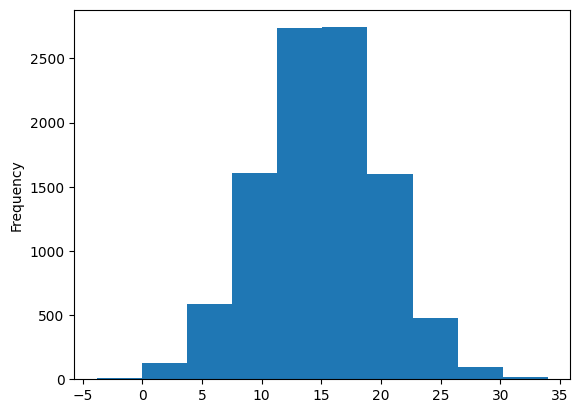

In [ ]:
sm_ds_3.run("Do you think is possible to forecast the temperature?")


In [ ]:
sm_ds_4.run("Do you think is possible to forecast the temperature?")



> Entering new AgentExecutor chain...
Thought: To determine if it is possible to forecast the temperature, we need to check if there is a relationship between the temperature and other variables in the dataframe.
Action: Check the correlation between the temperature and other variables.
Action Input: `df.corr()['Temperature']`
Observation: Check the correlation between the temperature and other variables. is not a valid tool, try one of [python_repl_ast].
Thought:I need to use the `python_repl_ast` tool to check the correlation between the temperature and other variables.
Action: python_repl_ast
Action Input: `df.corr()['Temperature']`
Observation: Temperature       1.000000
CO2 Emissions    -0.002775
Sea Level Rise    0.011663
Precipitation     0.004916
Humidity         -0.015737
Wind Speed        0.021779
Name: Temperature, dtype: float64
Thought:

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


The correlation between the temperature and other variables in the dataframe is very weak. Therefore, it may not be possible to accurately forecast the temperature based on the other variables in the dataframe.
Final Answer: It may not be possible to forecast the temperature accurately based on the other variables in the dataframe.

> Finished chain.


'It may not be possible to forecast the temperature accurately based on the other variables in the dataframe.'

The third question is the most difficult.

The agent must select and algorithm, and forecast the Data with this algorithm.

As final task I request a Graphic.

In [ ]:
sm_ds_3.run("""which coutries have the dataset?""")



> Entering new AgentExecutor chain...
Thought: I need to access the "Country" column in the dataframe and get a list of unique values.
Action: python_repl_ast
Action Input: df["Country"].unique()
Observation: ['Latvia' 'South Africa' 'French Guiana' 'Vietnam' 'Moldova'
 'Saint Helena' 'Tuvalu' 'Australia' 'Qatar' 'Chad' 'Fiji' 'Guernsey'
 'Egypt' 'Rwanda' 'Samoa' 'Mongolia' 'Equatorial Guinea'
 'Libyan Arab Jamahiriya' 'Mali' 'Cocos (Keeling) Islands' 'Bahrain'
 'French Southern Territories' 'Iceland' 'Tajikistan' 'Norfolk Island'
 'Bosnia and Herzegovina' 'Reunion' 'Ethiopia' 'Spain' 'Italy' 'Andorra'
 'Gibraltar' 'Monaco' 'Comoros'
 'British Indian Ocean Territory (Chagos Archipelago)' 'Czech Republic'
 'Iran' 'Antigua and Barbuda' 'Seychelles' 'Slovenia' 'Gabon' 'India'
 'Congo' 'Tunisia' 'Costa Rica' 'Cuba' 'Grenada' 'Suriname'
 'Brunei Darussalam' 'United States of America' 'Israel' 'Georgia'
 'Cape Verde' 'Ukraine' 'Colombia' 'Guyana' 'Estonia' 'Cambodia'
 'Maldives' 'Greece' '

'The dataset includes data from 217 different countries.'

In [ ]:
sm_ds_3.run("""
Can you create a line graph containing the anual average co2 emissions over the years?
""")




> Entering new AgentExecutor chain...
Thought: I need to use the pandas library to manipulate the dataframe and then use a plotting library to create the graph.
Action: [python_repl_ast]
Action Input: import pandas as pd
Observation: [python_repl_ast] is not a valid tool, try one of [python_repl_ast].
Thought: I need to use the pandas library to manipulate the dataframe and then use a plotting library to create the graph.
Action: [python_repl_ast]
Action Input: import pandas as pd
Observation: [python_repl_ast] is not a valid tool, try one of [python_repl_ast].
Thought: I need to use the pandas library to manipulate the dataframe and then use a plotting library to create the graph.
Action: [python_repl_ast]
Action Input: import pandas as pd
Observation: [python_repl_ast] is not a valid tool, try one of [python_repl_ast].
Thought: I need to use the pandas library to manipulate the dataframe and then use a plotting library to create the graph.
Action: [python_repl_ast]
Action Input: im

'To create a line graph containing the annual average CO2 emissions over the years, I need to use the pandas library to manipulate the dataframe and then use a plotting library such as matplotlib or seaborn to create the graph.'

In [ ]:
!pip install matplotlib



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include rows where the country is Portugal, then group by year and calculate the mean of the CO2 emissions column. Then I can plot the resulting data in a line graph.
Action: python_repl_ast
Action Input: df[df['Country'] == 'Portugal'].groupby(df['Date'].dt.year)['CO2 Emissions'].mean().plot()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A line graph showing the annual average CO2 emissions in Portugal over the years.

> Finished chain.


'A line graph showing the annual average CO2 emissions in Portugal over the years.'

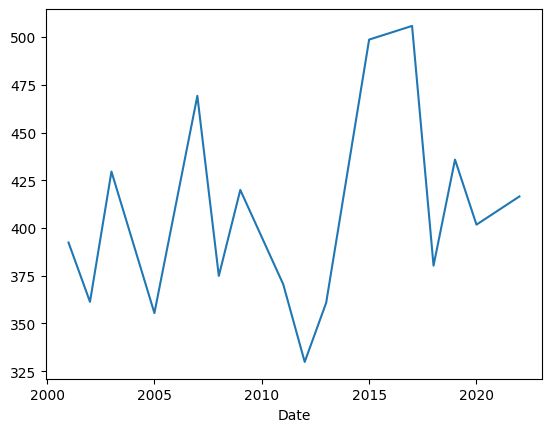

In [ ]:
sm_ds_3.run("""
Create a line graph containing the anual average co2 emissions in Portugal over the years.
""")

# Conclusions

This is one of the most powerful and, at the same time, easiest to use agents. We have seen how with just a few lines of code, we had an agent capable of following our instructions to analyze, clean, and generate charts from our data. Not only that, but it has also been able to draw conclusions and even decide which algorithm was best for forecasting the data.

The world of agents is just beginning, and many players are entering the field, such as Hugging Face, Microsoft, or Google. Their capabilities are not only growing with new tools but also with new language models.

**It's a revolution that we cannot afford to miss and will change many things.**